# Question 1:
- Learn about zipf's law
- Pick any file or files in NLTK package 
- Prove if zipf's law work in natural language or not 
- Requirements:
    - use glop to open and read file 
    - create at least one function and one lambda function 
    - save your data as csv file content(word, rank, frequency) with TITLE and sort it by rank 
    - open csv file and generate log-log fig according to data you saved 
    - write conclusion at the end based on your figure.

In [1]:
import nltk

In [2]:
from nltk.corpus import gutenberg

In [3]:
import glob

- Function for removing punctuation from the words.

In [4]:
import string
import re
import operator
import csv
def removePunctuation(unclear):
    filtered_words = [''.join(c for c in s if c not in string.punctuation) for s in unclear]
    filtered_words = [s for s in filtered_words if s]
    return filtered_words                       # After removing punctuation returning filtered words

- Function for writing data in to CSV file. 

In [5]:
import csv
def csvOperation(sortedList):
    with open('Frequency_Rank.csv', 'w',newline='') as myfile:
        wr = csv.w
        riter(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(("Word","Rank","Frequency"))            # giving headers to the columns
        for data in sortedList:
            wr.writerow(data)                               # writing each data row by row

- Code for calulating the frequency and assigning a rank 

In [6]:
import string
import re
import operator
import csv


allnames = gutenberg.fileids()
freq_dist={}
for file in allnames:
    filepath = gutenberg.abspath(file)
    txt = glob.glob(filepath)                      # Opening each file using glob for reading the text 
    for textfile in txt:
        unclear_words = list(gutenberg.words(textfile))
        filtered = removePunctuation(unclear_words)
        for word in filtered:
            if word in freq_dist:
                freq_dist[word] = freq_dist[word]+1    # creating a dist with word and its frequency
            else:
                freq_dist[word] = 1
sorted_characters = sorted(freq_dist.items(), key=operator.itemgetter(1), reverse = True) # sorting the dict based on frequency
print('sorted frequency list: \n ',sorted_characters[:10])
new_lst=[]
rank=1
for data in sorted_characters:
    new_lst.append((data[0],rank,data[1]))                 # creating a new list and assigning a rank to word
    rank_lamda = lambda rank:rank+1                         # incrimenting rank using lambda function
    rank= rank_lamda(rank)
csvOperation(new_lst)                                       # calling csv function for writing data in new list in to file

sorted frequency list: 
  [('the', 125750), ('and', 78848), ('of', 70080), ('to', 46446), ('a', 32505), ('in', 31959), ('I', 30256), ('that', 27301), ('he', 22203), ('his', 20594)]


- Function for plotting Log-Log graph

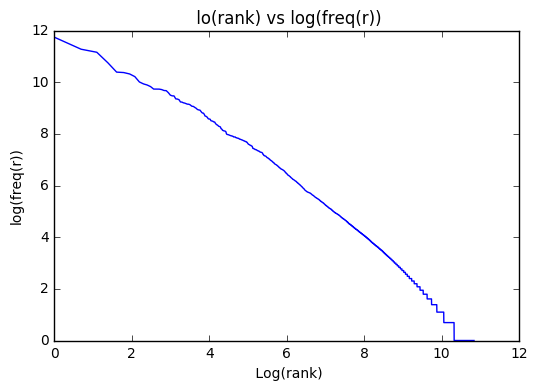

In [45]:
import csv
import matplotlib.pyplot as plt
import math
def plotZipf(fileName):
    #i=0
    freq_list=[]
    rank_list=[]
    with open(fileName, 'r') as csvfile:
        first=True
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:                        # reading data from csv file 
            if first:
                first=False
                continue
            r_data = float(row[1].strip('""'))     # conveting a value in to float
            rank = math.log(r_data)                # converting value in to log scale 
            f_data = row[2].strip('""')
            freq = math.log(float(f_data))
            rank_list.append(rank)                # creating list for rank and freq_rank log values 
            freq_list.append(freq)
    plt.plot(rank_list,freq_list)
    plt.xlabel(" Log(rank)")                       # plottng the values on x and y axis
    plt.ylabel("log(freq(r))")
    plt.title(" lo(rank) vs log(freq(r))")
    plt.show()
            
plotZipf('Frequency_Rank.csv')

# conclusion:
- for given package gutenberg Zipf's law hols or works for natural language. 
- As seen in above figure we get a graph line of slope -1 . That is the indication that zipf's law works on gutenberg package 
- plotted a graph og log(rank) vs log(freq(rank))